### Tarea 2 - Repaso de Conceptos de Programación             
<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo-Universidad-Andres-Bello-2013-Nuevo.jpg" width="150" align="right">

### Nombre: Juan Carlos Mérida

### Objetivo: Realizar un análisis detallado de los datos recopilados durante el año 2023 sobre la satisfacción relacionada con reclamos efectuados a través del Servicio Nacional del Consumidor (SERNAC) en Chile.

### Desarollo:

#### En primer lugar cargamos las librerías necesarias para desarrollar la actividad:

In [1]:
# Manipulación y análisis de datos:
import pandas as pd
import numpy as np
# Para graficar:
import matplotlib.pyplot as plt

### 1.-	Debe cargar el archivo en un DataFrame, desplegando la cantidad de registros (filas) y la cantidad de características presentes en la base de datos, debe eliminar del Da-taFrame las siguientes columnas: id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4, para aquellas columnas cuyos nombres vengan con espacios en blan-co al comienzo, debe quitar esos espacios y se requiere eliminar de los valores alma-cenados en la columna gen  el carácter punto con el cual vienen algunos géneros. (Ptj. 1)

#### Importamos nuestro archivo a analizar:

In [2]:
# Cargar los datos desde un archivo Excel en un DataFrame de pandas
df = pd.read_excel("SERNAC_bbdd-satisfaccion-fin-reclamos.xlsx")

# Mostrar las primeras 5 filas del DataFrame para tener una vista previa de los datos cargados
df.head()

,id,fecha_inicio,mes_reclamo,fecha_ultima_accion,pex,p1a,p1b,pinst,ppei1,ppei2,...,nps,pgen,gen,region,educ,edad,ocup,ingreso,sitdisc,indg
0,21554,2023-01-01 11:36:04,1,2023-01-01 11:46:34,5,5,4,5,NaN,NaN,...,5,5,Masculino.,Región de Valparaíso.,Superior universitaria completa.,65 años o más.,Jubilado/a,Entre $600.000 y $1.099.000,No,No
1,21556,2023-01-01 16:33:33,1,2023-01-01 16:35:40,1,1,1,1,NaN,NaN,...,1,5,Femenino.,Región de Valparaíso.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No
2,21558,2023-01-01 20:52:59,1,2023-01-01 20:56:38,4,2,2,2,NaN,NaN,...,5,2,Femenino.,Región Metropolitana de Santiago.,Superior universitaria completa.,45 a 64 años.,Asalariado/a,Menos de $300.000,No,No
3,21559,2023-01-01 22:24:17,1,2023-01-01 22:25:41,7,7,7,7,NaN,NaN,...,10,7,Femenino.,Región del Libertador General Bernardo O’Higgins.,Superior universitaria completa.,30 a 44 años.,Asalariado/a directivo/a o gerente,$1.100.000 o más,No,No
4,21560,2023-01-01 23:43:21,1,2023-01-01 23:45:25,7,1,1,7,NaN,NaN,...,10,7,Masculino.,Región de Antofagasta.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No


#### Contamos la cantidad de filas y columnas de nuestra base de datos:

In [3]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 4793
Número de columnas: 27


#### Eliminamos las columnas: id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4:

In [4]:
# Eliminar las columnas solicitadas del DataFrame
df.drop(['id', 'fecha_inicio', 'fecha_ultima_accion', 'ppei1', 'ppei2', 'ppei3', 'ppei4'], axis=1, inplace=True)

# Mostrar las primeras 5 filas del DataFrame para verificar que las columnas han sido eliminadas correctamente
df.head()

,mes_reclamo,pex,p1a,p1b,pinst,p2,p3,p4a,p4b,p4c,nps,pgen,gen,region,educ,edad,ocup,ingreso,sitdisc,indg
0,1,5,5,4,5,Solucionó parcialmente su Reclamo.,El SERNAC me envió información con la frecuenc...,7,5,6,5,5,Masculino.,Región de Valparaíso.,Superior universitaria completa.,65 años o más.,Jubilado/a,Entre $600.000 y $1.099.000,No,No
1,1,1,1,1,1,No solucionó su Reclamo.,Me hubiera gustado recibir información con may...,1,1,7,1,5,Femenino.,Región de Valparaíso.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No
2,1,4,2,2,2,No solucionó su Reclamo.,El SERNAC me envió información con la frecuenc...,3,3,3,5,2,Femenino.,Región Metropolitana de Santiago.,Superior universitaria completa.,45 a 64 años.,Asalariado/a,Menos de $300.000,No,No
3,1,7,7,7,7,Solucionó completamente su Reclamo.,El SERNAC me envió información con la frecuenc...,7,7,7,10,7,Femenino.,Región del Libertador General Bernardo O’Higgins.,Superior universitaria completa.,30 a 44 años.,Asalariado/a directivo/a o gerente,$1.100.000 o más,No,No
4,1,7,1,1,7,No solucionó su Reclamo.,El SERNAC me envió información con la frecuenc...,7,1,7,10,7,Masculino.,Región de Antofagasta.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No


#### Detectamos y eliminamos los espacios en blanco al inicio de nuestras columnas:

a.- Contamos espacios en blanco:

In [5]:
# Contar cuántas columnas en el DataFrame tienen espacios en blanco al inicio de su nombre
espacios_en_blanco_iniciales = df.columns.str.startswith(' ').sum()

# Imprimir el número de columnas que tienen espacios en blanco al inicio de su nombre
print(f"Número de columnas con espacios en blanco al inicio: {espacios_en_blanco_iniciales}")

Número de columnas con espacios en blanco al inicio: 0


Podemor observar que no tenemos ninguna columna con espacios en blanco en el comienzo, de todas formas aplicamos el código para eliminar aquellos espacios si hubiesen existido:

b.- Eliminamos posibles espacios en blanco:

In [6]:
# Eliminar los espacios en blanco al inicio y al final de los nombres de las columnas en el DataFrame
df.columns = df.columns.str.strip()

df.head()

,mes_reclamo,pex,p1a,p1b,pinst,p2,p3,p4a,p4b,p4c,nps,pgen,gen,region,educ,edad,ocup,ingreso,sitdisc,indg
0,1,5,5,4,5,Solucionó parcialmente su Reclamo.,El SERNAC me envió información con la frecuenc...,7,5,6,5,5,Masculino.,Región de Valparaíso.,Superior universitaria completa.,65 años o más.,Jubilado/a,Entre $600.000 y $1.099.000,No,No
1,1,1,1,1,1,No solucionó su Reclamo.,Me hubiera gustado recibir información con may...,1,1,7,1,5,Femenino.,Región de Valparaíso.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No
2,1,4,2,2,2,No solucionó su Reclamo.,El SERNAC me envió información con la frecuenc...,3,3,3,5,2,Femenino.,Región Metropolitana de Santiago.,Superior universitaria completa.,45 a 64 años.,Asalariado/a,Menos de $300.000,No,No
3,1,7,7,7,7,Solucionó completamente su Reclamo.,El SERNAC me envió información con la frecuenc...,7,7,7,10,7,Femenino.,Región del Libertador General Bernardo O’Higgins.,Superior universitaria completa.,30 a 44 años.,Asalariado/a directivo/a o gerente,$1.100.000 o más,No,No
4,1,7,1,1,7,No solucionó su Reclamo.,El SERNAC me envió información con la frecuenc...,7,1,7,10,7,Masculino.,Región de Antofagasta.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No


#### Detectamos y eliminamos los puntos de la columna "gen":

a.- Detectamos cuantos puntos hay en la columna "gen":

In [7]:
# Contar cuántas filas en la columna 'gen' contienen un punto ('.') en cualquier parte de su valor
puntos_en_gen = df['gen'].str.contains('\.').sum()

# Imprimir el número de filas que contienen un punto en la columna 'gen'
print(f"Número de filas con puntos en la columna 'gen': {puntos_en_gen}")

Número de filas con puntos en la columna 'gen': 4753


Con esto podemos entender que cada una de las filas en la columna "gen" contienen un punto.

b.- Procedemos a eliminar los puntos:

In [8]:
# Eliminar los puntos ('.') en los valores de la columna 'gen'
df['gen'] = df['gen'].str.replace('.', '', regex=False)

# Mostrar las primeras 3 filas del DataFrame para verificar que los puntos han sido eliminados de la columna 'gen'
df.head(3)

,mes_reclamo,pex,p1a,p1b,pinst,p2,p3,p4a,p4b,p4c,nps,pgen,gen,region,educ,edad,ocup,ingreso,sitdisc,indg
0,1,5,5,4,5,Solucionó parcialmente su Reclamo.,El SERNAC me envió información con la frecuenc...,7,5,6,5,5,Masculino,Región de Valparaíso.,Superior universitaria completa.,65 años o más.,Jubilado/a,Entre $600.000 y $1.099.000,No,No
1,1,1,1,1,1,No solucionó su Reclamo.,Me hubiera gustado recibir información con may...,1,1,7,1,5,Femenino,Región de Valparaíso.,Superior universitaria completa.,30 a 44 años.,Asalariado/a,$1.100.000 o más,No,No
2,1,4,2,2,2,No solucionó su Reclamo.,El SERNAC me envió información con la frecuenc...,3,3,3,5,2,Femenino,Región Metropolitana de Santiago.,Superior universitaria completa.,45 a 64 años.,Asalariado/a,Menos de $300.000,No,No


c.- Por último volvemos a contar para verificar el borrado correcto de los puntos:

In [9]:
# Contar cuántas filas en la columna 'gen' aún contienen un punto ('.') después de la limpieza
puntos_en_gen_despues = df['gen'].str.contains('\.').sum()

# Imprimir el número de filas que aún contienen un punto en la columna 'gen' después de la eliminación
print(f"Número de filas con puntos en la columna 'gen' después de la limpieza: {puntos_en_gen_despues}")

Número de filas con puntos en la columna 'gen' después de la limpieza: 0


### 2.- Implemente una función en Python que reciba por parámetro un DataFrame y el gé-nero, para este último los valores posibles son: Masculino, Femenino, No binario, Otro y Todos. Esta función debe devolver el NPS para el género solicitado, si es Todos devolverá el NPS considerando todos los registros. (Ptj. 3)

### Para realizar el cálculo de este score se hace en base a las respuestas a la pregunta: En una escala de 1 a 10 ¿qué tan probable es que usted recomiende el SERNAC a un familiar o un amigo/a para realizar un Reclamo?
### •	Los que responden con puntajes de 0 a 6 son considerados “detractores”
### •	Los que responden con puntajes 7 u 8 son clasificados como “pasivos”
### •	Aquellos que responden con puntajes 9 o 10 serán los “promotores”


#### a.- Definimos la función solicitada:

In [10]:
def calcular_nps(df, genero):
    # Filtrar el DataFrame por el género si no es "Todos"
    if genero != "Todos":
        df = df[df['gen'] == genero]
    
    # Calcular la cantidad total de respuestas
    total_respuestas = len(df)
    
    if total_respuestas == 0:
        return "No hay datos para el género solicitado"
    
    # Calcular la cantidad de Promotores, Pasivos y Detractores
    promotores = len(df[df['nps'] >= 9])
    detractores = len(df[df['nps'] <= 6])
    
    # Calcular el NPS
    nps = ((promotores - detractores) / total_respuestas) * 100
    
    return nps

#### b.- Averiguamos la información de nuestra columna:

In [11]:
# Obtener los valores únicos y la cantidad de cada uno
valores_gen_unicos = df['gen'].unique()
conteo_gen = df['gen'].value_counts()

# Mostrar los valores únicos
print("Valores únicos en la columna 'gen':")
print(valores_gen_unicos)

# Mostrar el conteo de cada valor
print("\nCantidad de ocurrencias de cada valor en la columna 'gen':")
print(conteo_gen)

Valores únicos en la columna 'gen':
['Masculino' 'Femenino' 'Otro' 'No binario']

Cantidad de ocurrencias de cada valor en la columna 'gen':
Femenino      2389
Masculino     2364
Otro            24
No binario      16
Name: gen, dtype: int64


In [12]:
# Obtener los valores únicos presentes en la columna 'gen'
valores_gen = df['gen'].unique()

# Imprimir los valores únicos encontrados en la columna 'gen'
print(valores_gen)

['Masculino' 'Femenino' 'Otro' 'No binario']


#### c.- Llamamos la función para el género "Masculino":

In [13]:
# Calcular el NPS para los registros en el DataFrame que corresponden al género "Masculino"
nps_masculino = calcular_nps(df, 'Masculino')

# Imprimir el valor del NPS calculado para el género "Masculino"
print(f"NPS para Masculino: {nps_masculino}")

NPS para Masculino: 13.409475465313028


#### d.- Llamamos la función para el género "Femenino":

In [14]:
# Calcular el NPS para los registros en el DataFrame que corresponden al género "Femenino"
nps_femenino = calcular_nps(df, 'Femenino')

# Imprimir el valor del NPS calculado para el género "Femenino"
print(f"NPS para Femenino: {nps_femenino}")

NPS para Femenino: 14.90163248221013


#### e.- Llamamos la función para el género "No binario":

In [15]:
# Calcular el NPS para los registros en el DataFrame que corresponden al género "No binario"
nps_no_binario = calcular_nps(df, 'No binario')

# Imprimir el valor del NPS calculado para el género "No binario"
print(f"NPS para No binario: {nps_no_binario}")

NPS para No binario: -37.5


#### f.- Llamamos la función para "Otro":

In [16]:
# Calcular el NPS para los registros en el DataFrame que corresponden al género "Otro"
nps_otro = calcular_nps(df, 'Otro')

# Imprimir el valor del NPS calculado para el género "Otro"
print(f"NPS para Otro: {nps_otro}")

NPS para Otro: -37.5


#### g.- Llamamos la función para "Todos":

In [17]:
# Calcular el NPS para todos los registros en el DataFrame, sin filtrar por género
nps_general = calcular_nps(df, 'Todos')

# Imprimir el valor del NPS calculado para todos los géneros en conjunto
print(f"NPS general: {nps_general}")

NPS general: 13.728353849363655


### 3.- Muestre la cantidad de registros para cada categoría de edad y nivel de sueldo disponible, donde la categoría de edad estará en las filas y el sueldo en las columnas. (Ptj. 1)

A continuación mostraré 2 formas de hacer esta tabla:

In [18]:
# Crear una tabla pivote para mostrar la cantidad de registros por categoría de edad y nivel de ingreso
tabla_pivote = df.pivot_table(index='edad', columns='ingreso', aggfunc='size', fill_value=0)

# Mostrar la tabla pivote
tabla_pivote

ingreso,$1.100.000 o más,Entre $300.001 y $399.999,Entre $400.000 y $599.999,Entre $600.000 y $1.099.000,Menos de $300.000
edad,,,,,
18 a 29 años.,86,31,67,118,137
30 a 44 años.,868,82,260,519,177
45 a 64 años.,803,107,269,498,211
65 años o más.,162,54,121,147,76


In [19]:
# Crear una tabla a través de crosstab para mostrar la cantidad de registros por categoría de edad y nivel de ingreso
tabla_contingencia = pd.crosstab(df['edad'], df['ingreso'])

# Mostrar la tabla
tabla_contingencia

ingreso,$1.100.000 o más,Entre $300.001 y $399.999,Entre $400.000 y $599.999,Entre $600.000 y $1.099.000,Menos de $300.000
edad,,,,,
18 a 29 años.,86,31,67,118,137
30 a 44 años.,868,82,260,519,177
45 a 64 años.,803,107,269,498,211
65 años o más.,162,54,121,147,76


### 4.- Despliegue las top “N” Regiones que presentan mayor cantidad de reclamos en que el cliente “No soluciono su reclamo” ordenadas de mayor a menor, debe mostrar el nombre la región junto con la cantidad de observaciones que cumplan con lo requerido, N es un valor que si se cambia el código debe devolver la cantidad que se requiere. (Ptj.2)

a.- Primero identificamos la columna que contiene la información, y dada la descripción, p2 se ajusta a lo requerido:

In [20]:
# Obtener los valores únicos y la cantidad de cada uno
valores_p2_unicos = df['p2'].unique()
conteo_p2 = df['p2'].value_counts()

# Mostrar los valores únicos
print("Valores únicos en la columna 'p2':")
print(valores_p2_unicos)

# Mostrar el conteo de cada valor
print("\nCantidad de ocurrencias de cada valor en la columna 'p2':")
print(conteo_p2)

Valores únicos en la columna 'p2':
['Solucionó parcialmente su Reclamo.' 'No solucionó su Reclamo.'
 'Solucionó completamente su Reclamo.' 'Otro']

Cantidad de ocurrencias de cada valor en la columna 'p2':
No solucionó su Reclamo.               2041
Solucionó completamente su Reclamo.    1716
Solucionó parcialmente su Reclamo.      518
Otro                                    518
Name: p2, dtype: int64


b.- Creamos una función para desplegar el top de Regiones que presentan mayor cantidad de reclamos en el que el cliente "No solucionó su reclamo":

In [21]:
def top_n_regiones(df, N):
    # Filtrar los registros donde el cliente no solucionó su reclamo
    df_no_soluciono = df[df['p2'] == 'No solucionó su Reclamo.']
    
    # Agrupar por región y contar la cantidad de observaciones
    conteo_regiones = df_no_soluciono.groupby('region').size().reset_index(name='cantidad')
    
    # Ordenar de mayor a menor según la cantidad de observaciones
    conteo_regiones_ordenado = conteo_regiones.sort_values(by='cantidad', ascending=False)
    
    # Seleccionar las top N regiones
    top_n = conteo_regiones_ordenado.head(N)
    
    return top_n

c.- Definimos un número de top "N" para llamar a la función:

In [22]:
N = 10  # Se modifica según el requerimiento de top 
top_regiones = top_n_regiones(df, N)
top_regiones

,region,cantidad
0,Región Metropolitana de Santiago.,1093
11,Región de Valparaíso.,217
12,Región del Biobío.,145
13,Región del Libertador General Bernardo O’Higgins.,90
7,Región de Los Lagos.,81
14,Región del Maule.,81
5,Región de Coquimbo.,68
6,Región de La Araucanía.,65
1,Región de Antofagasta.,57
10,Región de Tarapacá.,28


### 5.	Desarrolle una función que reciba por parámetro un DataFrame y el nombre de una columna que pertenezca a este, para datos discretos que puede ser: gen, región, educ, edad, ocup, ingreso, sitdisc o indg. La función debe mostrar un gráfico de ba-rras con la cantidad de reclamos completamente solucionados para cada categoría de la columna recibida por parámetro. (Ptj 1)

#### a.- Definimos la función en cuestión:

In [23]:
def grafico_reclamos_solucionados(df, columna):
    # Filtrar los registros donde el reclamo está completamente solucionado
    df_solucionado = df[df['p2'] == 'Solucionó completamente su Reclamo.']
    
    # Agrupar por la columna recibida y contar los registros
    conteo = df_solucionado.groupby(columna).size().reset_index(name='cantidad')
    
    # Ordenar por cantidad
    conteo = conteo.sort_values(by='cantidad', ascending=False)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(conteo[columna], conteo['cantidad'], color='blue')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de Reclamos Solucionados')
    plt.title(f'Cantidad de Reclamos Completamente Solucionados por {columna}')
    plt.xticks(rotation=45, ha='right')
    
    # Añadir etiquetas de valor encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

He decidido llamar a la función con 4 variables y hacer un acotado análisis para cada uno de estos gráficos.

#### b.- Llamamos a la función con la variable región:

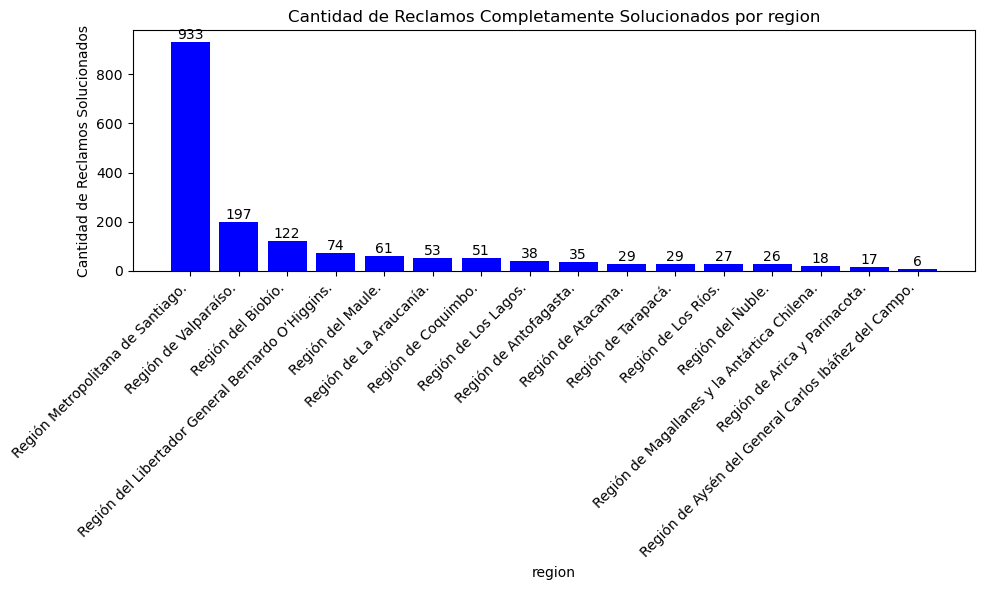

In [24]:
grafico_reclamos_solucionados(df, 'region')

El análisis revela que la Región Metropolitana registra la mayor cantidad de reclamos "Completamente Solucionados", con un total de 933 casos, superando ampliamente a la Región de Valparaíso, que ocupa el segundo lugar con 197 reclamos resueltos. Sin embargo, esta diferencia en números absolutos no permite por sí sola determinar la efectividad de la gestión en estas regiones.

Para una evaluación más precisa, sería fundamental considerar el número total de reclamos recibidos en cada región. Solo así podríamos calcular la proporción de reclamos resueltos, lo que ofrecería una medida más adecuada de la eficiencia y capacidad de respuesta en cada región.

#### c.- Llamamos a la función con la variable gen:

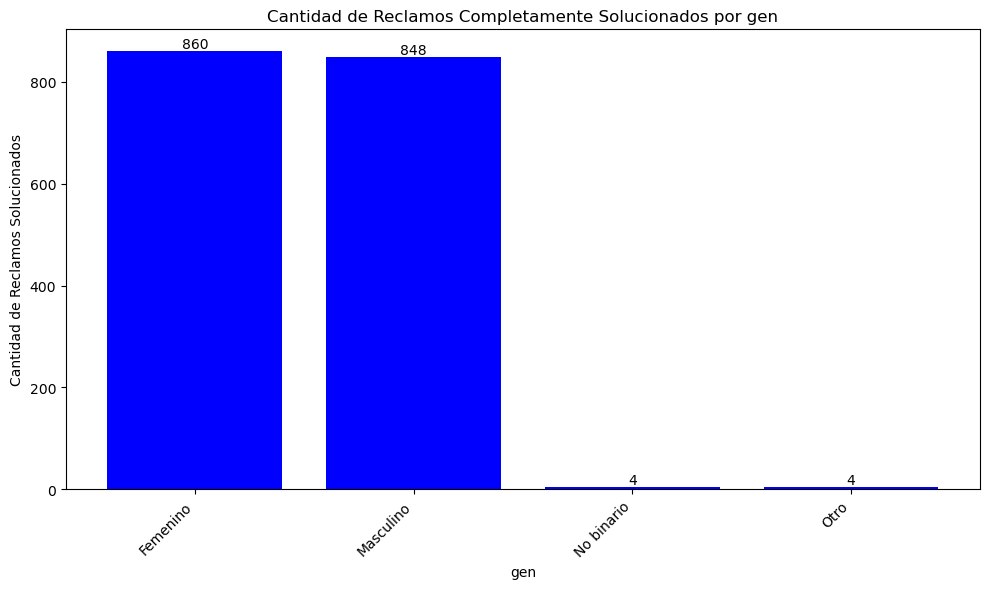

In [25]:
grafico_reclamos_solucionados(df, 'gen')

El análisis de los datos muestra que los reclamos "Completamente Solucionados" están distribuidos de manera bastante equilibrada entre los géneros Femenino y Masculino, con 860 y 848 casos respectivamente. Esta paridad sugiere que, en términos absolutos, tanto mujeres como hombres están viendo una cantidad similar de sus reclamos resueltos.

Sin embargo, el número de casos es significativamente menor para las categorías de "No binario" y "Otro", con solo 4 reclamos solucionados en cada caso. Este marcado contraste puede deberse a una menor representación de estos grupos en la muestra total o a posibles diferencias en cómo se gestionan sus reclamos. Para entender completamente la situación, sería crucial comparar estos datos con el total de reclamos recibidos por cada género, lo que permitiría evaluar si existen disparidades en la eficiencia de resolución entre los diferentes grupos de género.

#### d.- Llamamos a la función con la variable ocup:

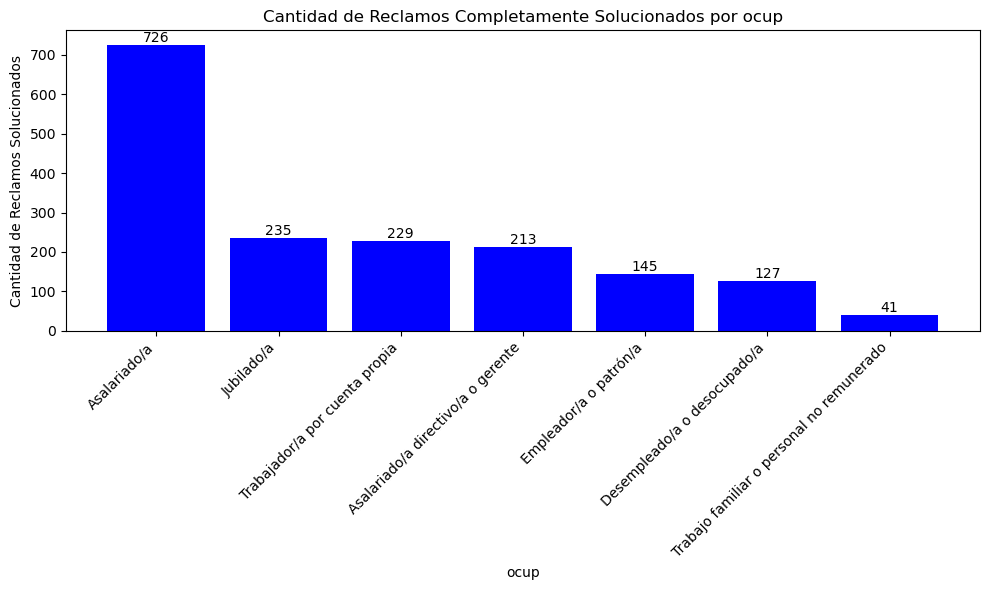

In [26]:
grafico_reclamos_solucionados(df, 'ocup')

El gráfico muestra que la mayoría de los reclamos "Completamente Solucionados" provienen de personas asalariadas, con 726 casos. Les siguen jubilados/as (235 casos) y trabajadores/as por cuenta propia (229 casos). En contraste, los grupos con menos reclamos solucionados incluyen a quienes trabajan en roles no remunerados (41 casos) y desempleados/as (127 casos). Esto sugiere que la estabilidad laboral y el acceso a recursos podrían estar relacionados con la capacidad de resolver reclamos satisfactoriamente.

#### e.- Llamamos a la función con la variable edad:

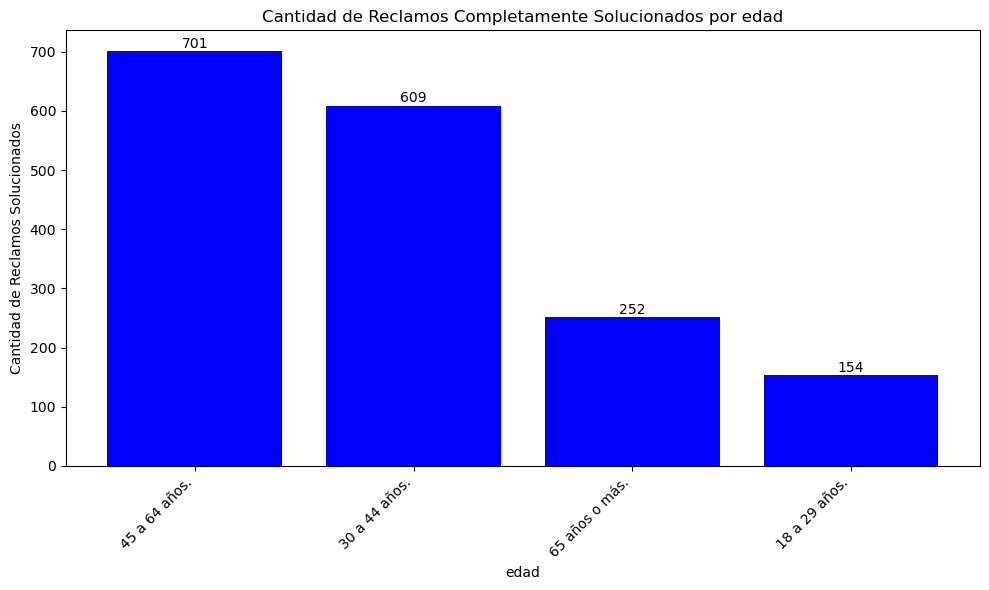

In [27]:
grafico_reclamos_solucionados(df, 'edad')

El análisis de los reclamos "Completamente Solucionados" según la edad muestra que el grupo de 45 a 64 años es el que tiene la mayor cantidad de reclamos resueltos, con 701 casos. Le sigue el grupo de 30 a 44 años, con 609 casos, y el grupo de 65 años o más, con 252 casos. Por otro lado, el grupo más joven, 18 a 29 años, tiene la menor cantidad de reclamos solucionados, con 154 casos.

Este patrón sugiere que los reclamos completamente solucionados tienden a concentrarse en las personas de mediana edad y mayores, mientras que los más jóvenes tienen una menor representación en estos resultados.

### 6.	Para el mes en que se genera la mayor cantidad de reclamos, independiente si hay o no solución, muestre en forma ordenadas para cada género de mayor a menor la cantidad de reclamos realizada por clientes con nivel de estudios “Superior Universi-taria Completa” y compare esta cantidad con aquellos con nivel de estudios “Básica incompleta”, concluya a que puede asociar este resultado. (Ptj 2)

#### Primero grafiquemos el mes con más reclamos, para ello importamos una librería adicional: "calendar"

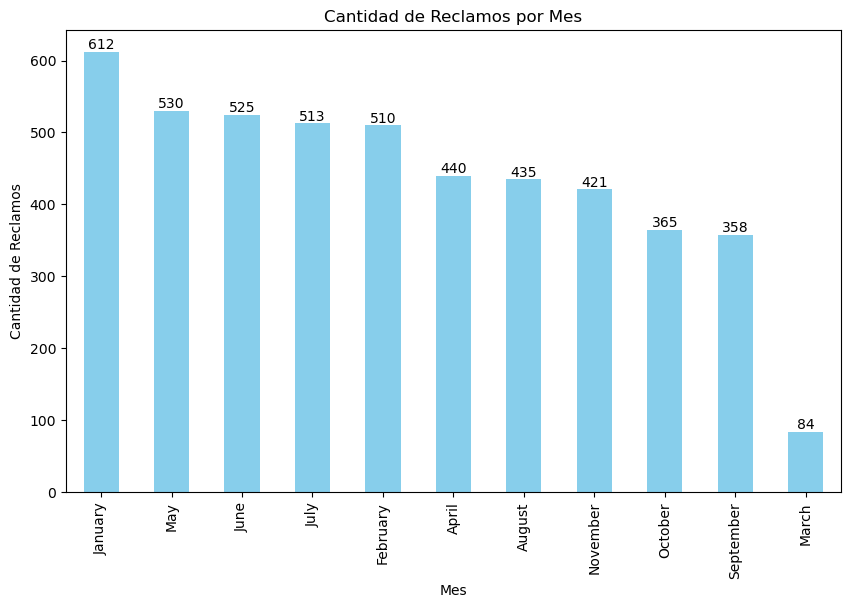

In [28]:
import calendar

# Contar la cantidad de reclamos por mes
reclamos_por_mes = df['mes_reclamo'].value_counts()

# Ordenar los resultados de mayor a menor
reclamos_por_mes = reclamos_por_mes.sort_values(ascending=False)

# Convertir los números de mes a nombres de mes
reclamos_por_mes.index = reclamos_por_mes.index.map(lambda x: calendar.month_name[x])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
reclamos_por_mes.plot(kind='bar', color='skyblue')

# Título y etiquetas del gráfico
plt.title('Cantidad de Reclamos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Reclamos')

# Mostrar los valores sobre las barras
for index, value in enumerate(reclamos_por_mes):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Podemos apreciar que el mes con más reclamos es January(ing); Enero(esp), aún así en nuestra función buscaremos el mes con más reclamos.

#### Definimos una función para ordenar los pasos y obtener lo requerido:

In [29]:
def analizar_reclamos_por_nivel_educativo(df):
    # Identificar el mes con la mayor cantidad de reclamos
    mes_max_reclamos = df['mes_reclamo'].value_counts().idxmax()

    # Filtrar los datos para ese mes específico
    df_mes_max = df[df['mes_reclamo'] == mes_max_reclamos]

    # Filtrar para el nivel educativo "Superior Universitaria Completa" y "Básica incompleta"
    df_superior = df_mes_max[df_mes_max['educ'] == 'Superior universitaria completa.']
    df_basica = df_mes_max[df_mes_max['educ'] == 'Básica incompleta.']

    # Contar la cantidad de reclamos para cada género en ambos niveles educativos
    reclamos_superior = df_superior.groupby('gen').size().sort_values(ascending=False)
    reclamos_basica = df_basica.groupby('gen').size().sort_values(ascending=False)

    # Mostrar los resultados
    print(f"Mes con mayor cantidad de reclamos: {mes_max_reclamos}\n")
    
    print("Cantidad de reclamos por género para clientes con 'Superior Universitaria Completa':")
    print(reclamos_superior)
    print("\nCantidad de reclamos por género para clientes con 'Básica incompleta':")
    print(reclamos_basica)

#### Llamamos a la función:

In [30]:
analizar_reclamos_por_nivel_educativo(df)

Mes con mayor cantidad de reclamos: 1

Cantidad de reclamos por género para clientes con 'Superior Universitaria Completa':
gen
Masculino     186
Femenino      165
Otro            4
No binario      2
dtype: int64

Cantidad de reclamos por género para clientes con 'Básica incompleta':
gen
Femenino     2
Masculino    2
dtype: int64


El análisis de los reclamos realizados en el mes con la mayor cantidad de casos (enero) revela diferencias significativas en la participación de los clientes según su nivel educativo y género. En particular, los clientes con nivel educativo "Superior Universitaria Completa" presentan un volumen mucho mayor de reclamos comparado con aquellos con "Básica incompleta".

### Conclusión:

Este resultado sugiere que las personas con un nivel educativo más alto, como aquellos con "Superior Universitaria Completa", son significativamente más propensas a presentar reclamos que aquellas con "Básica incompleta". Esto puede asociarse a varios factores:

   **- Acceso a Recursos e Información:** Las personas con niveles educativos más altos probablemente tienen un mejor acceso a la información sobre cómo presentar reclamos, así como a los recursos necesarios para hacerlo. Esto puede incluir mayor familiaridad con procedimientos burocráticos, mejor acceso a plataformas digitales, y un mayor nivel de confianza en la efectividad de presentar un reclamo.

   **- Percepción de Derechos:** Es posible que los individuos con un mayor nivel educativo estén más conscientes de sus derechos como consumidores y, por lo tanto, estén más inclinados a tomar acción cuando sienten que esos derechos no han sido respetados.

   **- Diferencias en Necesidades y Expectativas:** Aquellos con un nivel educativo más alto pueden tener expectativas más altas sobre los productos o servicios que consumen, lo que podría llevar a un mayor número de reclamos cuando esas expectativas no se cumplen.

   **- Perspectiva de Género:** Observamos que, aunque los hombres tienden a presentar un mayor número de reclamos en el nivel "Superior Universitaria Completa", esta diferencia no es tan marcada cuando se compara con las mujeres en el mismo nivel educativo (186 hombres frente a 165 mujeres). En contraparte, en el nivel "Básica incompleta", el número de reclamos es muy bajo transversalmente. Esto sugiere que, a niveles educativos más bajos, las barreras para presentar reclamos podrían ser similares entre géneros, pero a medida que el nivel educativo aumenta, es posible que tanto hombres como mujeres se sientan más empoderados para hacer valer sus derechos como consumidores, aunque los hombres todavía predominan ligeramente.

#### En resumen, este análisis destaca la influencia del nivel educativo en la propensión a realizar reclamos; es decir, a mayor nivel educativo, mayor es la cantidad de reclamos (una correlación directa), con una distribución de género relativamente equilibrada.